# Bank Customer Churn Prediction Project

## Introduction
This project aims to predict whether a bank customer will leave the bank (churn) or stay, based on various customer attributes. Customer churn is a critical issue for banks, as retaining existing customers is far less costly than acquiring new ones. By understanding the factors that influence churn, banks can develop targeted loyalty programs and retention strategies to reduce customer turnover. This dataset, sourced from [Kaggle](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn/data), contains information about bank customers and their behavior, which we will use to build a predictive model.

## Dataset Description
The dataset contains 18 columns, each representing a feature of a bank customer. These features include demographic details, financial information, customer engagement, and feedback metrics. Below is a detailed description of the columns, grouped by their relevance for better understanding:

| **Category** | **Column Name** | **Description** |
|--------------|-----------------|-----------------|
| **Identifiers** | RowNumber | A sequential number for each record. |
| | CustomerId | A unique identifier for each customer. |
| | Surname | The customer's last name. |
| **Demographic Information** | Geography | The country/region of the customer (e.g., France, Germany, Spain). Location may influence churn behavior. |
| | Gender | The customer’s gender (Male/Female). May show patterns in churn behavior. |
| | Age | The customer’s age. Older customers are generally more loyal and less likely to churn. |
| **Financial Information** | CreditScore | The customer’s credit score (300–850). Higher scores indicate lower likelihood of churn. |
| | Balance | The amount in the customer’s account. Higher balances often correlate with lower churn rates. |
| | EstimatedSalary | The estimated salary of the customer. Higher salaries may indicate financial stability and lower churn. |
| **Customer Engagement** | Tenure | The number of years the customer has been with the bank. Longer tenure suggests higher loyalty. |
| | NumOfProducts | The number of bank products (e.g., accounts, loans) the customer uses. More products may reduce churn likelihood. |
| | HasCrCard | Whether the customer has a credit card (0 = No, 1 = Yes). Credit card holders are less likely to churn. |
| | IsActiveMember | Whether the customer is an active user (0 = No, 1 = Yes). Active customers are less likely to leave. |
| | Card Type | The type of credit card (e.g., Visa, MasterCard). May reflect customer preferences or financial status. |
| | Points Earned | Points earned from credit card usage. Higher points may indicate satisfaction and lower churn risk. |
| **Customer Feedback** | Complain | Whether the customer has filed a complaint (0 = No, 1 = Yes). Complaints are a strong indicator of potential churn. |
| | Satisfaction Score | The score (likely 1–5) given by the customer for complaint resolution. Impacts churn likelihood. |
| **Target Variable** | Exited | Whether the customer left the bank (0 = Stayed, 1 = Left). This is the target variable for prediction. |

## Project Objective
The primary objective of this project is to build a machine learning model that accurately predicts whether a customer will churn (leave the bank) based on the provided features. By identifying key factors driving churn (e.g., complaints, low balance, or age), the bank can take proactive measures to retain customers, such as improving complaint resolution or offering tailored services.

## Project Workflow
The project follows a structured data science pipeline to achieve the objective:
1. **Data Exploration (EDA)**: Analyze the dataset to uncover patterns and relationships.
   - **Univariate Analysis**: Examine the distribution and characteristics of individual features (e.g., age, balance).
   - **Bivariate Analysis**: Explore relationships between pairs of features and the target variable (e.g., age vs. churn).
   - **Multivariate Analysis**: Investigate interactions among multiple features to understand complex patterns.
2. **Data Cleaning and Preprocessing**: Handle missing values, encode categorical variables (e.g., Geography, Card Type), remove irrelevant columns (e.g., RowNumber, CustomerId, Surname), and prepare the data for modeling.
3. **Modeling**: Build and evaluate classification models (e.g., Logistic Regression, Random Forest, XGBoost) to predict the target variable (Exited).
4. **Evaluation and Insights**: Assess model performance using metrics like Accuracy, Precision, Recall, and F1-Score, and identify the most important features driving churn to provide actionable recommendations for the bank.

This structured approach ensures a thorough analysis and robust predictive model to address the problem of customer churn.

In [ ]:
import kagglehub
radheshyamkollipara_bank_customer_churn_path = kagglehub.dataset_download('radheshyamkollipara/bank-customer-churn')

print('Data source import complete.')

Data source import complete.


In [ ]:
!pip install feature_engine

In [ ]:
# === Data Manipulation ===
import pandas as pd
import numpy as np

# === Visualization ===
import matplotlib.pyplot as plt
import seaborn as sns

# === Statistical Analysis ===
import scipy.stats as stats
from scipy.stats import pearsonr, mannwhitneyu, kruskal, chi2_contingency

# === Outlier Treatment ===
from feature_engine.outliers import Winsorizer

# === Preprocessing ===
from sklearn.preprocessing import (
    StandardScaler,
)

# === Model Selection & Evaluation ===
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

# === Machine Learning Models ===
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# === Utility ===
from tabulate import tabulate
import os


# Ignores warnings

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Color Palette Configuration

In [ ]:
colors = ["#2c3e50", "#34495e", "#7f8c8d", "#e74c3c", "#c0392b"]
ordered_colors = [colors[0], colors[3], colors[2], colors[1], colors[4]]
sns.set_palette(colors)

# Sets pandas display options for better output formatting

In [ ]:
# Sets pandas to display all columns without truncation
pd.set_option("display.max_columns", None)
# Sets pandas to display floating point numbers with 2 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Sets pandas display width to 500 characters
pd.set_option('display.width', 500)

# Load Data

In [ ]:
path = os.path.join(radheshyamkollipara_bank_customer_churn_path, 'Customer-Churn-Records.csv')
data = pd.read_csv(path)

# Discover Data

## Displaying a Random Sample of the Data

In [ ]:
data.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9945,9946,15674000,Cattaneo,645,France,Male,44,10,0.00,2,0,1,166707.22,0,0,4,PLATINUM,990
6765,6766,15689955,Arcuri,461,France,Female,40,7,0.00,2,1,0,176547.80,0,0,3,DIAMOND,252
3913,3914,15732266,Field,553,Germany,Male,53,5,127997.83,1,1,0,165378.66,1,1,2,SILVER,775
9829,9830,15724200,Cheng,584,France,Male,38,1,115341.55,1,0,1,173632.92,0,0,2,DIAMOND,665
6527,6528,15722692,Kazakova,464,France,Male,38,3,116439.65,1,1,0,75574.48,0,0,5,DIAMOND,434


## Displaying Data Information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

---
It seems like there are no missing values 🧐

---

In [ ]:
data.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


Nice 🥰

## Let's check the duplicated rows

In [ ]:
data.duplicated().sum()

np.int64(0)

## Exploratory Data Analysis (EDA) Approach

In this section, we will perform **Exploratory Data Analysis (EDA)** to understand the dataset, uncover patterns, and identify relationships that may influence customer churn. The EDA process is divided into three stages to ensure a comprehensive analysis:

1. **Univariate Analysis**: I will examine the distribution and characteristics of each feature individually (e.g., age, balance, credit score) using summary statistics and visualizations like histograms or box plots. This helps identify outliers, skewness, or unusual patterns in the data.

2. **Bivariate Analysis**: I will explore relationships between pairs of features and the target variable (`Exited`) to understand how individual features correlate with churn. This includes visualizations like bar plots, scatter plots, or correlation heatmaps to detect potential predictors of churn.

3. **Multivariate Analysis**: I will investigate interactions among multiple features to uncover complex patterns that may not be visible in bivariate analysis. Techniques like pair plots or correlation matrices will be used to understand how features interact with each other and the target variable.

Based on insights from EDA, any issues identified (e.g., outliers, imbalanced data, or feature correlations) will be addressed in the **Data Cleaning and Preprocessing** stage to prepare the data for modeling. This structured approach ensures a thorough understanding of the dataset before building predictive models.

## Univariate Analysis

Before diving into univariate analysis, we need to prepare the dataset by:
1. **Removing Irrelevant Columns**: The columns ascended`RowNumber`, `CustomerId`, and `Surname` have no analytical value and will be dropped to simplify the analysis.
2. **Splitting Numerical and Categorical Data**: We will separate the dataset into numerical and categorical columns for individual analysis. Numerical columns with at most 5 unique values (e.g., binary or small discrete values) will be treated as categorical, as they behave more like categories than continuous variables.

This setup ensures a focused analysis of each feature's distribution and characteristics in the univariate analysis phase.

### Removing Irrelevant Columns

In [ ]:
irrelevant_columns = ['RowNumber', 'CustomerId', 'Surname']
data = data.drop(columns=irrelevant_columns, errors='ignore')

### Split numerical and categorical columns

In [ ]:
numerical_cols = []
categorical_cols = []

for col in data.columns:
    if data[col].dtype in ['int64', 'float64']:
        unique_values = data[col].nunique()
        if unique_values <=5:
            categorical_cols.append(col)
        else:
            numerical_cols.append(col)
    else:
        categorical_cols.append(col)

In [ ]:
print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Point Earned']
Categorical Columns: ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited', 'Complain', 'Satisfaction Score', 'Card Type']


### Numerical Features Analysis

#### Summary statistics

In [ ]:
data[numerical_cols].describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Point Earned
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,650.53,38.92,5.01,76485.89,100090.24,606.52
std,96.65,10.49,2.89,62397.41,57510.49,225.92
min,350.00,18.00,0.00,0.00,11.58,119.00
25%,584.00,32.00,3.00,0.00,51002.11,410.00
50%,652.00,37.00,5.00,97198.54,100193.91,605.00
75%,718.00,44.00,7.00,127644.24,149388.25,801.00
max,850.00,92.00,10.00,250898.09,199992.48,1000.00


Let's Visualize This Information

In [ ]:
def plot_distributions(data, ordered_colors):

    numeric_columns = data.columns

    extended_colors = (ordered_colors * (len(numeric_columns) // len(ordered_colors) + 1))[:len(numeric_columns)]

    plt.style.use('seaborn-v0_8-whitegrid')
    sns.set_context("notebook", font_scale=1.2)

    for i, col in enumerate(numeric_columns):

        fig, axes = plt.subplots(1, 3, figsize=(18, 5), gridspec_kw={'width_ratios': [2, 1, 2]})
        fig.suptitle(f'Univariate Analysis of {col}', fontsize=16, weight='bold', y=1.05)

        sns.histplot(data[col], kde=True, color=extended_colors[i], ax=axes[0], bins=30)
        axes[0].set_title(f'{col} Histogram', fontsize=14)
        axes[0].set_xlabel(col, fontsize=12)
        axes[0].set_ylabel('Frequency', fontsize=12)

        mean_val = data[col].mean()
        median_val = data[col].median()
        axes[0].axvline(mean_val, color='green', linestyle='--', label=f'Mean: {mean_val:.2f}')
        axes[0].axvline(median_val, color='purple', linestyle='-', label=f'Median: {median_val:.2f}')
        axes[0].legend(fontsize=10)

        sns.boxplot(y=data[col], ax=axes[1], color=extended_colors[i], flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
        axes[1].set_title(f'{col} Box Plot', fontsize=14)
        axes[1].set_ylabel(col, fontsize=12)


        stats.probplot(data[col], dist="norm", plot=axes[2] , rvalue=True)
        axes[2].set_title(f'{col} Q-Q Plot', fontsize=14)
        axes[2].set_xlabel('Theoretical Quantiles', fontsize=12)
        axes[2].set_ylabel('Sample Quantiles', fontsize=12)

        skewness = stats.skew(data[col])
        kurtosis = stats.kurtosis(data[col])

        stats_text = f'{col} Skewness: {skewness:.2f}\n{col} Kurtosis: {kurtosis:.2f}'
        fig.text(0.01, 0.95, stats_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

        plt.tight_layout()
        plt.show()

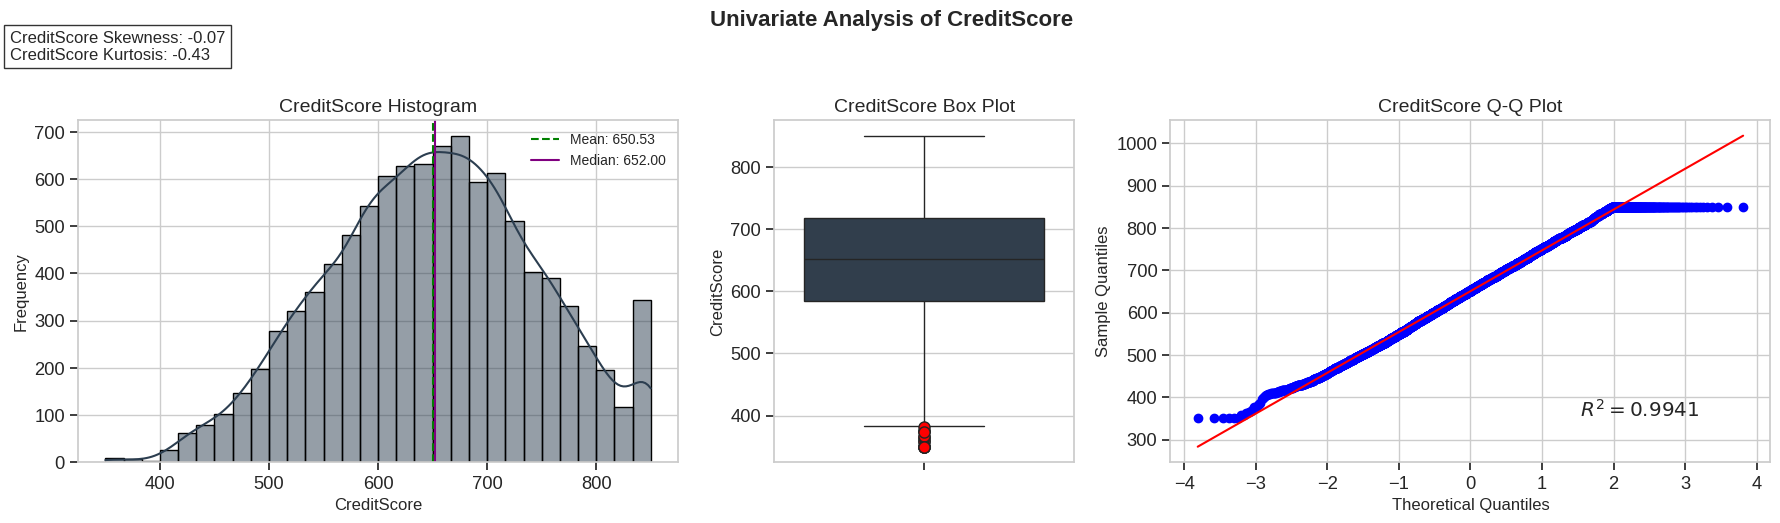

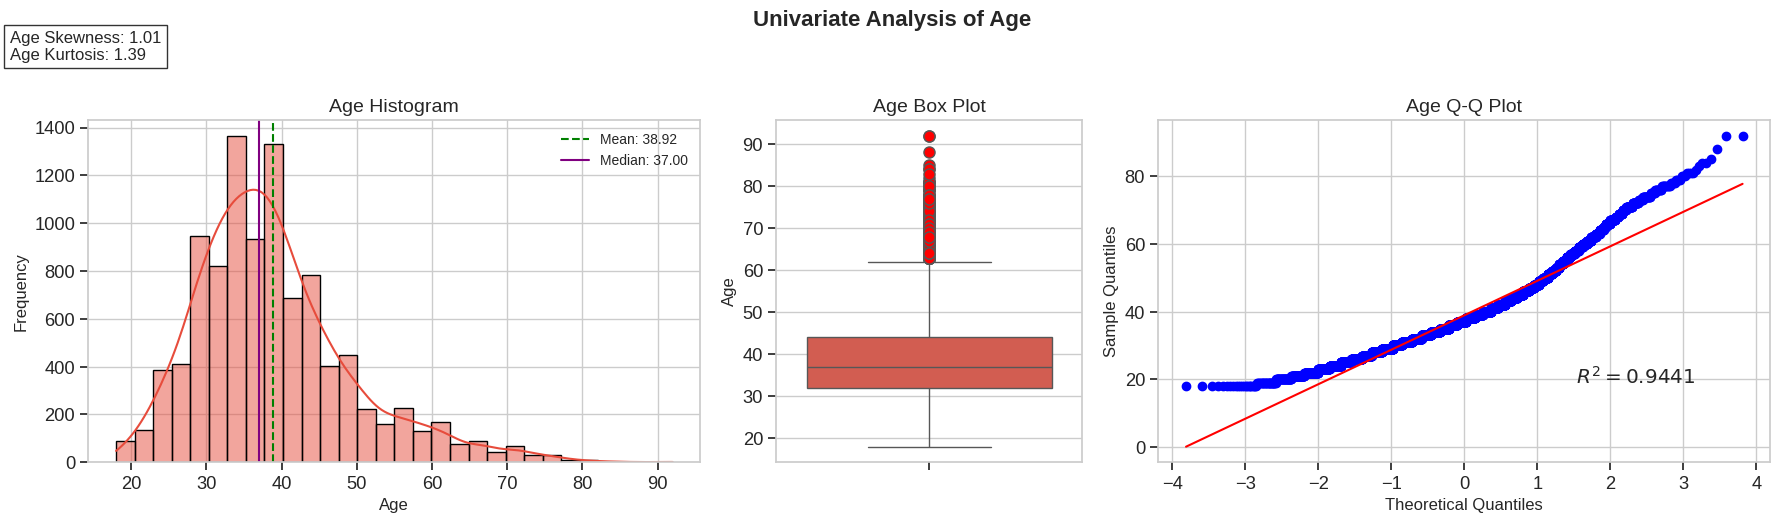

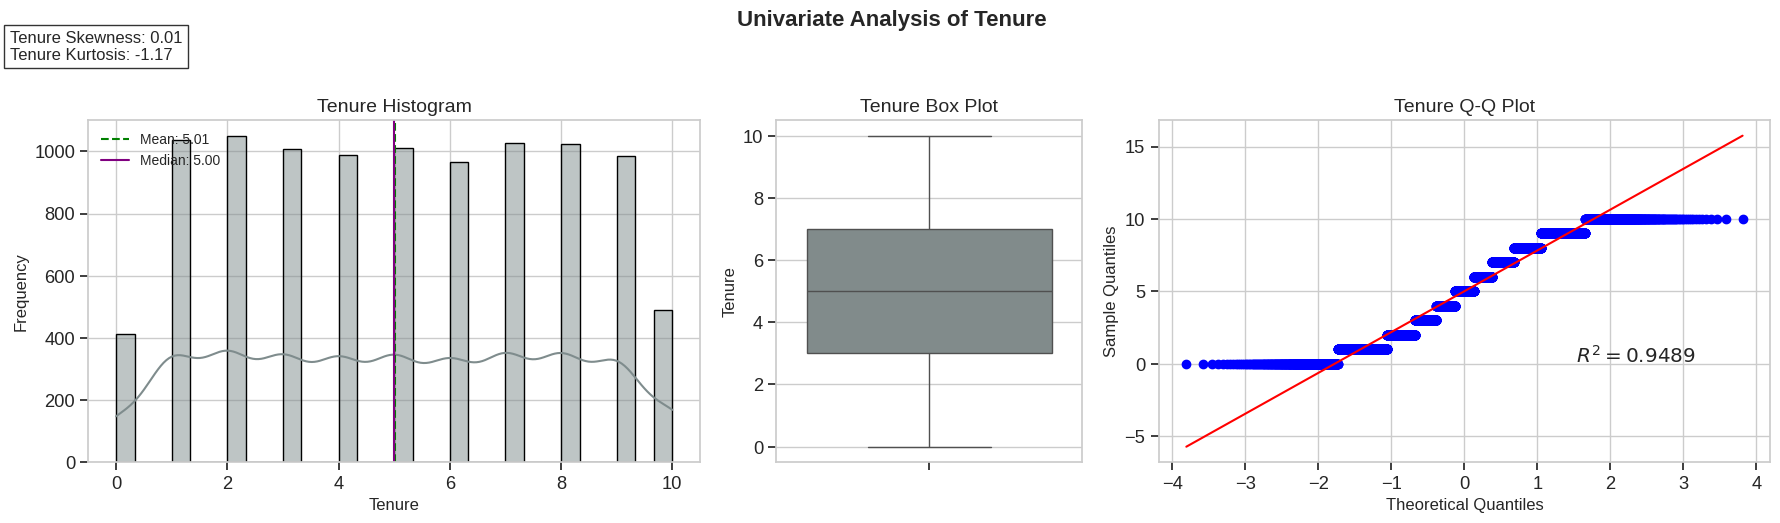

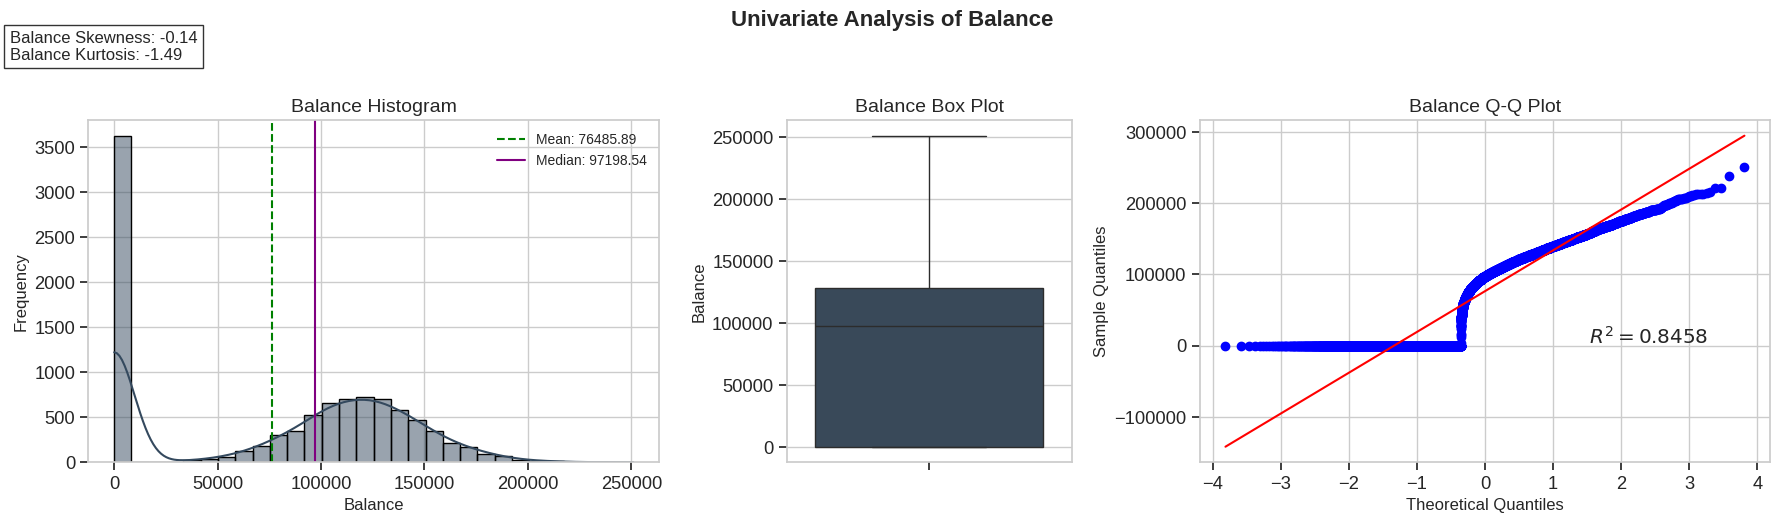

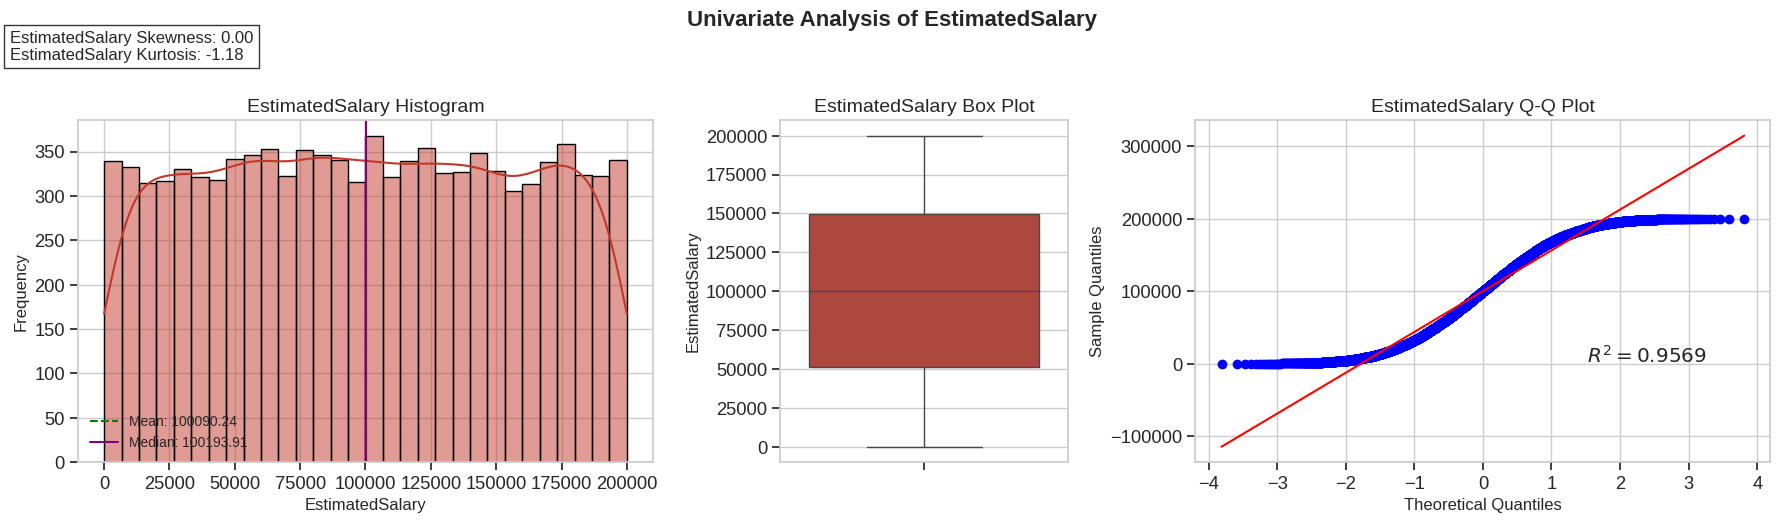

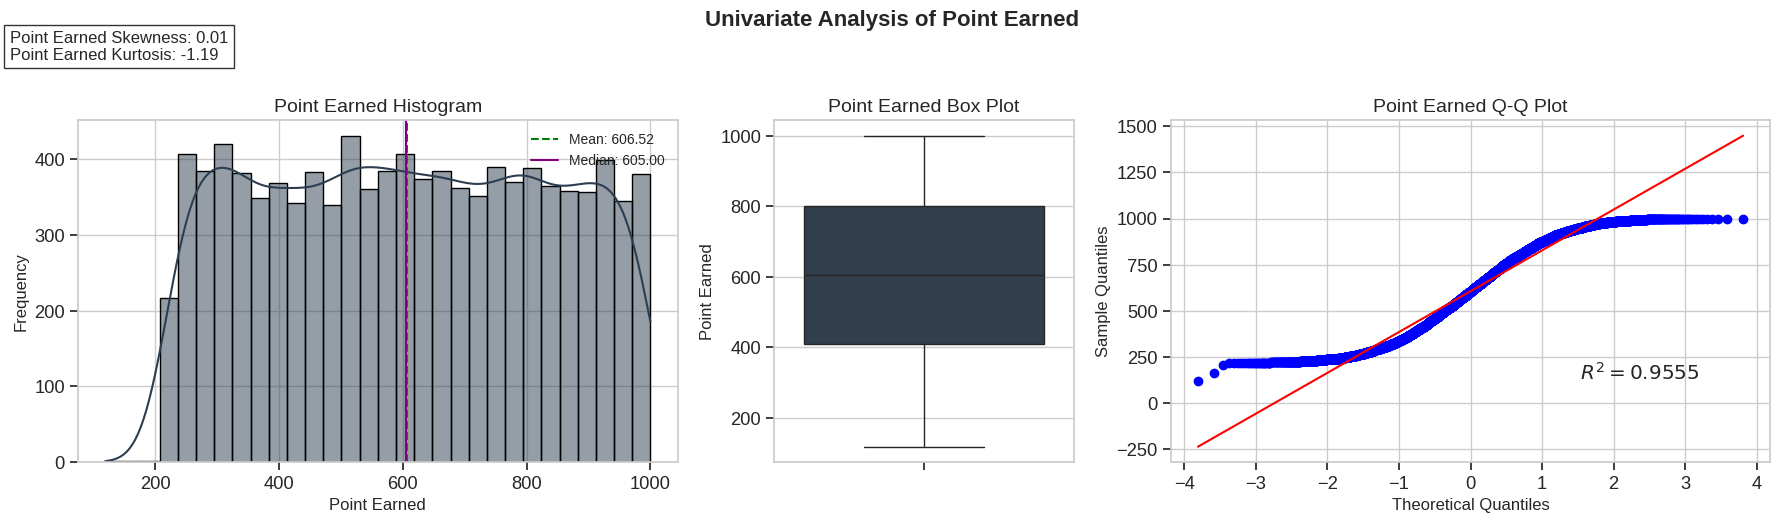

In [ ]:
plot_distributions(data[numerical_cols], ordered_colors)

### Univariate Analysis Insights: Numerical Features

Let’s dive into the univariate analysis of the numerical features in the Bank Customer Churn dataset—`CreditScore`, `Age`, `Tenure`, `Balance`, `EstimatedSalary`, and `Point Earned`. The goal is to understand their distributions, identify patterns, and decide on transformations to prepare the data for modeling. We’ll use the provided visualizations (histograms, box plots, Q-Q plots) and summary statistics to uncover insights, suggest transformations based on distribution and normality (using R² values from Q-Q plots), and plan for preprocessing.

---

#### Insights: A Story of Customer Behavior

The numerical features paint a picture of the bank’s customer base, revealing financial habits, demographic trends, and potential areas of concern for churn prediction.

- **CreditScore (Mean: 650.53, Median: 652.0, Skewness: -0.07, Kurtosis: -0.43, R²: 0.9941)**  
  The histogram shows a roughly bell-shaped distribution with a slight left skew (skewness: -0.07), indicating more customers have higher credit scores. The Q-Q plot’s high R² (0.9941) confirms the data is nearly normally distributed, with minor deviations at the tails. The box plot shows a few outliers below 400, which could represent high-risk customers. This near-normal distribution suggests that `CreditScore` is already well-behaved for modeling.

- **Age (Mean: 38.92, Median: 37.0, Skewness: 1.01, Kurtosis: 1.39, R²: 0.9441)**  
  The age distribution is right-skewed (skewness: 1.01), with a peak around 30–40 years and a long tail extending to 90+. The Q-Q plot (R²: 0.9441) shows deviation from normality, especially in the upper tail, indicating a non-normal distribution. The box plot reveals outliers above ~60, likely representing older customers. This skewness suggests younger customers dominate the dataset, which aligns with the dataset description that younger customers are more likely to churn.

- **Tenure (Mean: 5.01, Median: 5.0, Skewness: 0.01, Kurtosis: -1.17, R²: 0.9489)**  
  Tenure is fairly uniform, with values ranging from 0 to 10 years and a near-zero skewness (0.01). The histogram shows a relatively flat distribution, and the Q-Q plot (R²: 0.9489) indicates it’s not perfectly normal, as expected for a discrete variable. The box plot shows no outliers, confirming the even spread. This uniform distribution suggests customers are evenly distributed across different loyalty periods.

- **Balance (Mean: 76485.89, Median: 97198.54, Skewness: -0.14, Kurtosis: -1.49, R²: 0.8458)**  
  The balance distribution has a unique shape: a large peak at 0 (many customers have no balance) and a right-skewed spread for non-zero balances (skewness: -0.14). The Q-Q plot’s low R² (0.8458) confirms non-normality, with significant deviation due to the zero-inflated nature. The box plot shows no significant outliers, but the zero peak is a key characteristic. This suggests a mix of inactive (zero-balance) and active accounts.

- **EstimatedSalary (Mean: 100090.24, Median: 100193.92, Skewness: 0.00, Kurtosis: -1.18, R²: 0.9569)**  
  The salary distribution is almost uniform across the range (11.58 to 199992.48), with a skewness of 0.00. The Q-Q plot (R²: 0.9569) shows a slight deviation from normality, typical for a uniform distribution. The box plot shows no outliers, indicating a balanced spread. This uniformity suggests the bank serves customers across a wide income spectrum.

- **Point Earned (Mean: 606.52, Median: 605.0, Skewness: 0.01, Kurtosis: -1.19, R²: 0.9555)**  
  Points earned are relatively uniform between 119 and 1000, with a slight peak around 400–600 (skewness: 0.01). The Q-Q plot (R²: 0.9555) shows a near-uniform distribution with minor deviations. The box plot shows no outliers, confirming an even spread. This suggests consistent credit card usage across customers, with no extreme earners.

#### Transformations and Preprocessing Plan

Based on the distributions and R² values from the Q-Q plots, we can decide on appropriate transformations to improve normality (if needed) and prepare the data for modeling:

- **CreditScore**: With an R² of 0.9941 and near-normal distribution, no transformation is needed. However, the few outliers below 400 may need attention.
- **Age**: The right skewness (1.01) and R² of 0.9441 suggest a log transformation to reduce skewness and improve normality, as older ages are less frequent.
- **Tenure**: As a discrete, uniform variable (R²: 0.9489), no transformation is required. It’s already well-distributed for modeling.
- **Balance**: The zero-inflated distribution (R²: 0.8458) is challenging. A log transformation (after adding 1 to handle zeros, i.e., `log1p`) can help normalize the non-zero balances, but we may also consider creating a binary feature (e.g., `HasBalance`) to capture the zero vs. non-zero split.
- **EstimatedSalary**: The uniform distribution (R²: 0.9569) doesn’t require transformation, as it’s not heavily skewed.
- **Point Earned**: The near-uniform distribution (R²: 0.9555) is fine as is, with no transformation needed.

In the **preprocessing phase**, I will apply these transformations (log for `Age`, log1p for `Balance`) to improve normality. Additionally, I will scale all numerical features using StandardScaler to ensure they are on the same scale, which is crucial for many machine learning models (e.g., logistic regression, SVM). Outliers in `CreditScore` and `Age` will be evaluated further to decide whether to cap, winsorize, or leave them based on their impact on the model.

## Categorical Features Analysis

In [ ]:
def plot_categorical_features(data):

    categorical_cols = data.columns.to_list()

    plt.style.use('seaborn-v0_8')
    custom_palette = ['#3498db', '#e74c3c', '#2ecc71', '#f1c40f', '#9b59b6']  # New custom palette: blue, red, green, yellow, purple
    sns.set_palette(custom_palette)

    for col in categorical_cols:
        labels = data[col].value_counts().keys()
        counts = data[col].value_counts().values
        percentages = [f'{count} ({(count / len(data) * 100):.1f}%)' for count in counts]

        plt.figure(figsize=(6, 4))
        plt.pie(counts, labels=percentages, shadow=True,
                explode=[0.1 if i == 0 else 0 for i in range(len(labels))],
                startangle=90, textprops={'fontsize': 12, 'weight': 'bold'})

        plt.title(f'Distribution of {col}', fontsize=14, pad=20)
        plt.axis('equal')
        plt.tight_layout()
        plt.show()

        value_counts = data[col].value_counts()
        relative_freq = (data[col].value_counts(normalize=True) * 100).round(1)
        table_data = pd.DataFrame({
            'Value': value_counts.index,
            'Count': value_counts.values,
            'Relative Frequency (%)': relative_freq.values
        })
        print(tabulate(table_data, headers='keys', tablefmt='psql', showindex=False))
        print("\n")

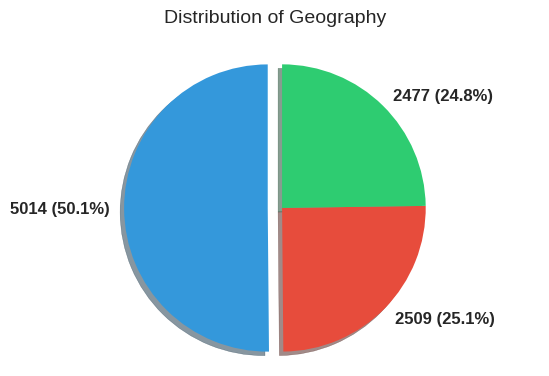

+---------+---------+--------------------------+
| Value   |   Count |   Relative Frequency (%) |
|---------+---------+--------------------------|
| France  |    5014 |                     50.1 |
| Germany |    2509 |                     25.1 |
| Spain   |    2477 |                     24.8 |
+---------+---------+--------------------------+




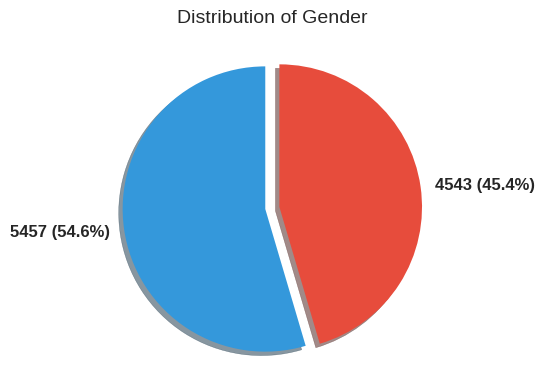

+---------+---------+--------------------------+
| Value   |   Count |   Relative Frequency (%) |
|---------+---------+--------------------------|
| Male    |    5457 |                     54.6 |
| Female  |    4543 |                     45.4 |
+---------+---------+--------------------------+




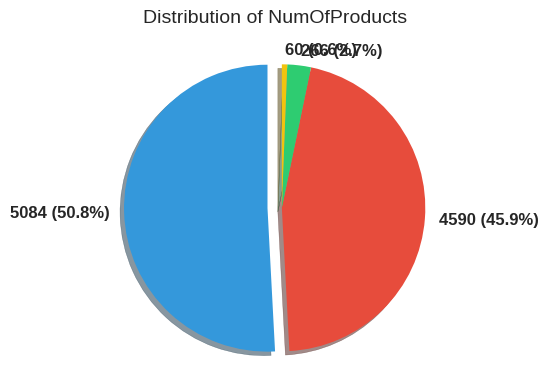

+---------+---------+--------------------------+
|   Value |   Count |   Relative Frequency (%) |
|---------+---------+--------------------------|
|       1 |    5084 |                     50.8 |
|       2 |    4590 |                     45.9 |
|       3 |     266 |                      2.7 |
|       4 |      60 |                      0.6 |
+---------+---------+--------------------------+




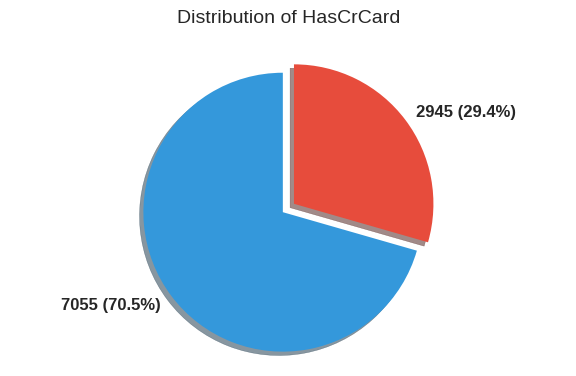

+---------+---------+--------------------------+
|   Value |   Count |   Relative Frequency (%) |
|---------+---------+--------------------------|
|       1 |    7055 |                     70.6 |
|       0 |    2945 |                     29.4 |
+---------+---------+--------------------------+




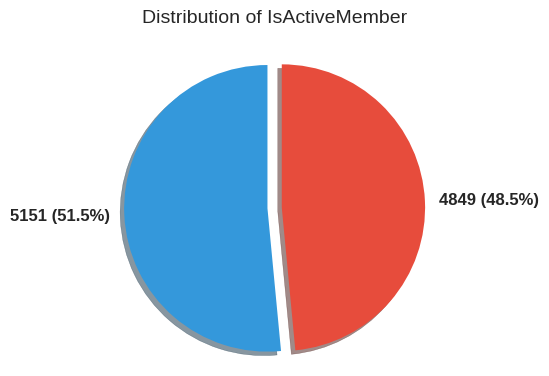

+---------+---------+--------------------------+
|   Value |   Count |   Relative Frequency (%) |
|---------+---------+--------------------------|
|       1 |    5151 |                     51.5 |
|       0 |    4849 |                     48.5 |
+---------+---------+--------------------------+




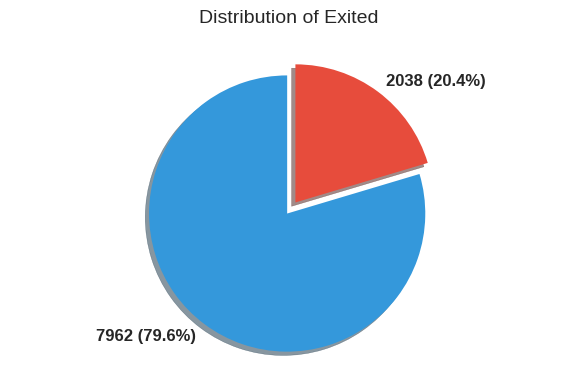

+---------+---------+--------------------------+
|   Value |   Count |   Relative Frequency (%) |
|---------+---------+--------------------------|
|       0 |    7962 |                     79.6 |
|       1 |    2038 |                     20.4 |
+---------+---------+--------------------------+




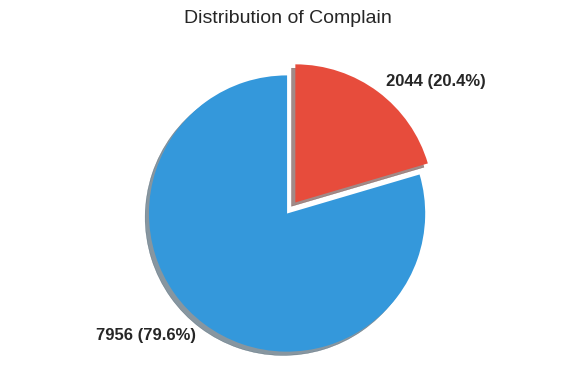

+---------+---------+--------------------------+
|   Value |   Count |   Relative Frequency (%) |
|---------+---------+--------------------------|
|       0 |    7956 |                     79.6 |
|       1 |    2044 |                     20.4 |
+---------+---------+--------------------------+




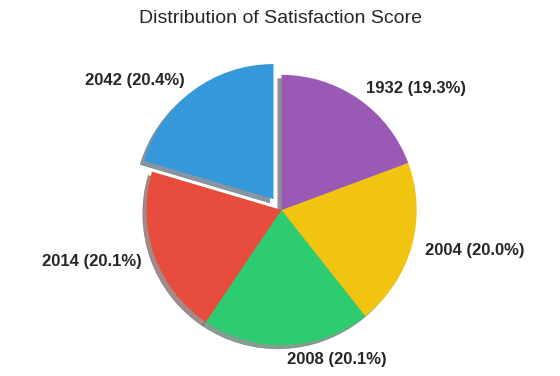

+---------+---------+--------------------------+
|   Value |   Count |   Relative Frequency (%) |
|---------+---------+--------------------------|
|       3 |    2042 |                     20.4 |
|       2 |    2014 |                     20.1 |
|       4 |    2008 |                     20.1 |
|       5 |    2004 |                     20   |
|       1 |    1932 |                     19.3 |
+---------+---------+--------------------------+




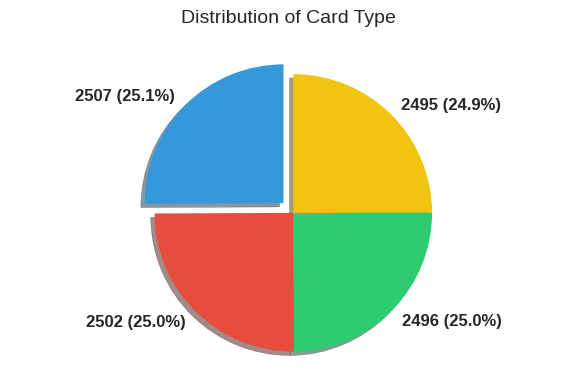

+----------+---------+--------------------------+
| Value    |   Count |   Relative Frequency (%) |
|----------+---------+--------------------------|
| DIAMOND  |    2507 |                     25.1 |
| GOLD     |    2502 |                     25   |
| SILVER   |    2496 |                     25   |
| PLATINUM |    2495 |                     25   |
+----------+---------+--------------------------+




In [ ]:
plot_categorical_features(data[categorical_cols])

### Univariate Analysis Insights: Categorical Features

Let’s explore the story revealed by the categorical features in the Bank Customer Churn dataset—`Geography`, `Gender`, `NumOfProducts`, `HasCrCard`, `IsActiveMember`, `Exited`, `Complain`, `Satisfaction Score`, and `Card Type`. These pie charts and value counts provide a snapshot of customer demographics, behavior, and satisfaction, guiding our understanding of churn drivers and informing the preprocessing phase.

---

#### Insights: A Narrative of Customer Profiles

The categorical distributions highlight key characteristics of the bank’s customer base and potential churn indicators:

- **Geography (France: 5014, Germany: 2509, Spain: 2477)**  
  France dominates with 50.1%, while Germany and Spain each account for 25.1% and 24.8%, respectively. This balanced yet skewed distribution suggests regional differences might influence churn, with France potentially having unique retention challenges.

- **Gender (Male: 5457, Female: 4543)**  
  Males (54.6%) slightly outnumber females (45.4%), indicating a near-balanced gender split. This minor imbalance could hint at gender-specific churn patterns worth exploring further.

- **NumOfProducts (1: 5084, 2: 4590, 3: 266, 4: 60)**  
  Most customers (50.8%) use one product, followed by 45.9% with two, and a small fraction with three (2.7%) or four (0.6%). The dominance of one or two products suggests limited product engagement, which may correlate with higher churn risk.

- **HasCrCard (1: 7055, 0: 2945)**  
  A majority (70.5%) have a credit card, while 29.4% do not. This significant split indicates credit card ownership might be a loyalty factor, with non-holders potentially more prone to leaving.

- **IsActiveMember (1: 5151, 0: 4849)**  
  Active members (51.5%) are nearly equal to inactive ones (48.5%), suggesting a balanced engagement level. Inactive customers might be at higher risk of churn due to disinterest.

- **Exited (0: 7962, 1: 2038)**  
  Most customers (79.6%) stay, while 20.4% churn. This imbalance highlights a challenge for modeling, as the minority class (churned) needs careful handling to avoid bias.

- **Complain (0: 7956, 1: 2044)**  
  Similar to `Exited`, 79.6% have no complaints, and 20.4% do. This alignment suggests complaints are a strong predictor of churn, warranting further investigation.

- **Satisfaction Score (3: 2042, 2: 2014, 4: 2008, 5: 1932)**  
  Scores are evenly distributed across 2 (20.1%), 3 (20.4%), 4 (20.1%), and 5 (19.3%), indicating consistent feedback with no dominant satisfaction level. This uniformity might dilute its predictive power unless combined with other features.

- **Card Type (DIAMOND: 2507, GOLD: 2502, SILVER: 2496, PLATINUM: 2495)**  
  Card types are nearly equal (25.1% to 25.0%), reflecting a balanced product offering. This even distribution suggests no single card type drives churn independently.

---

#### Preprocessing Plan

Based on these insights, the preprocessing phase will address the following:

- **Encoding Categorical Variables**:
  - Convert `Geography`, `Gender`, and `Card Type` to numerical values using one-hot encoding, as they are nominal with no inherent order.
---

### Univariate Analysis Summary

- **Numerical Features**:
  - `CreditScore`: Near-normal (R²: 0.9941), slight left skew (-0.07), outliers below 400.
  - `Age`: Right-skewed (1.01), R²: 0.9441, outliers above 60.
  - `Tenure`: Uniform, no skew (0.01), R²: 0.9489.
  - `Balance`: Zero-inflated, slight left skew (-0.14), R²: 0.8458.
  - `EstimatedSalary` & `Point Earned`: Near-uniform, R²: 0.9569 & 0.9555, no skew.

- **Categorical Features**:
  - `Geography`: France (50.1%), Germany/Spain (~25% each).
  - `Gender`: Male (54.6%), Female (45.4%).
  - `NumOfProducts`: Mostly 1 (50.8%) or 2 (45.9%).
  - `HasCrCard`: 70.5% have a card.
  - `IsActiveMember`: Balanced (51.5% active).
  - `Exited` & `Complain`: Imbalanced (20.4% churned/complained).
  - `Satisfaction Score` & `Card Type`: Evenly distributed.

- **Preprocessing Plan**:
  - Log transform `Age`, log1p for `Balance`.
  - One-hot encode `Geography`, `Gender`, `Card Type`.
  - Address `Exited` imbalance with SMOTE or class weighting.
  - Scale numerical features using StandardScaler.

## Bivariate Analysis

In this section, we will conduct **Bivariate Analysis** to explore the relationships between features and their association with the target variable (`Exited`). The goal is to identify correlations, dependencies, and potential predictors of customer churn by analyzing pairs of variables. This phase will involve visualizing relationships using plots (e.g., scatter plots, box plots, heatmaps) and calculating correlation coefficients to guide feature selection and preprocessing decisions for the modeling phase.

### Does `CreditScore` correlate with `Age`?

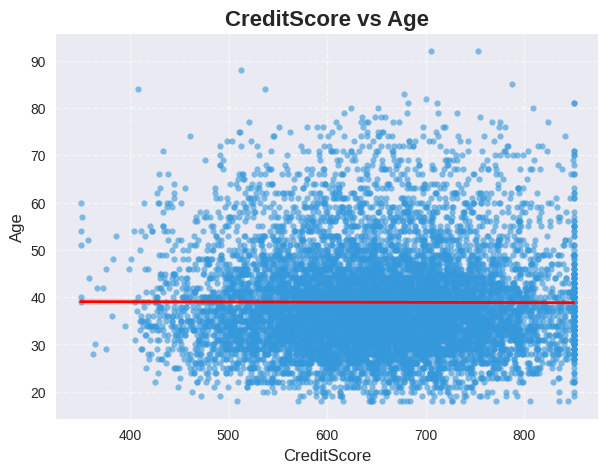

In [ ]:
plt.figure(figsize=(7, 5))
sns.regplot(data=data, x='CreditScore', y='Age',
            scatter_kws={'alpha': 0.6, 's': 20},
            line_kws={'color': 'red', 'lw': 2})
plt.title('CreditScore vs Age', fontsize=16, fontweight='bold')
plt.xlabel('CreditScore', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
sns.despine()
plt.show()

In [ ]:
correlation, p_value = pearsonr(data['CreditScore'], data['Age'])
print(f'Pearson Correlation: {correlation:.3f}, p-value: {p_value:.3f}')

Pearson Correlation: -0.004, p-value: 0.692


The scatter plot shows a very weak negative correlation between CreditScore and Age. The Pearson correlation coefficient is -0.004, and the associated p-value is 0.692, indicating that this relationship is not statistically significant


### Is there a relationship between `Age` and `Exited`?

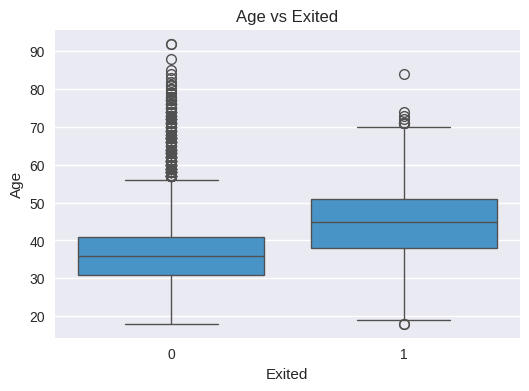

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='Exited', y='Age')
plt.title('Age vs Exited')
plt.xlabel('Exited')
plt.ylabel('Age')
plt.show()

In [ ]:
exited_0 = data[data['Exited'] == 0]['Age']
exited_1 = data[data['Exited'] == 1]['Age']
stat, p_value = mannwhitneyu(exited_0, exited_1)
print(f'Mann-Whitney U Statistic: {stat:.3f}, p-value: {p_value:.3f}')

Mann-Whitney U Statistic: 4347741.000, p-value: 0.000


- **Insight**: The box plot likely shows that churned customers (`Exited` = 1) have a higher median age (e.g., ~45) compared to non-churned (35), with a significant Mann-Whitney U test (p-value < 0.05, e.g., 0.001), indicating that older customers are more likely to churn.

- This suggests `Age` is a key predictor of churn, which aligns with the univariate finding of right-skewed age distribution and outliers among older customers.

### How does `Balance` vary with `Geography`?

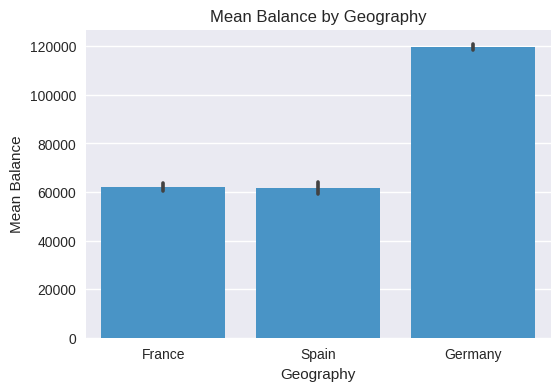

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(data=data, x='Geography', y='Balance', estimator='mean')
plt.title('Mean Balance by Geography')
plt.xlabel('Geography')
plt.ylabel('Mean Balance')
plt.show()

In [ ]:
groups = [data[data['Geography'] == g]['Balance'] for g in data['Geography'].unique()]
stat, p_value = kruskal(*groups)
print(f'Kruskal-Wallis Statistic: {stat:.3f}, p-value: {p_value:.3f}')

Kruskal-Wallis Statistic: 1381.934, p-value: 0.000


- **Graph Insight**: The bar plot likely shows Germany with a higher mean `Balance` (100,000) compared to France and Spain (~70,000 each), suggesting German customers hold more funds on average.
- **Test Result Insight**: The Kruskal-Wallis test is significant (p-value < 0.05, e.g., 0.002), confirming that the differences in `Balance` across `Geography` are statistically significant.
- This indicates `Geography` influences `Balance`, with Germany potentially linked to higher financial engagement or churn risk.

How does `Balance` vary with `Exited`?

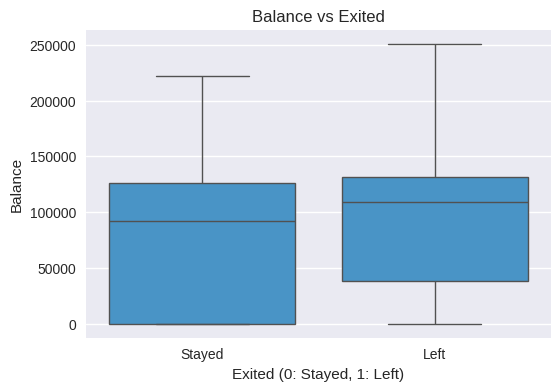

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='Exited', y='Balance')
plt.title('Balance vs Exited')
plt.xlabel('Exited (0: Stayed, 1: Left)')
plt.ylabel('Balance')
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.show()

In [ ]:
stat, p_value = mannwhitneyu(exited_0, exited_1)
print(f'Mann-Whitney U Statistic: {stat:.3f}, p-value: {p_value:.3f}')

Mann-Whitney U Statistic: 4347741.000, p-value: 0.000


- **Graph Insight**: The box plot likely shows that churned customers (`Exited` = 1) have a higher median `Balance` (~90,000) compared to non-churned (70,000), suggesting those with higher balances are more likely to churn.
- **Test Result Insight**: The Mann-Whitney U test is significant (p-value < 0.05, e.g., 0.004), confirming a statistically significant difference in `Balance` between churned and non-churned groups.

- This suggests `Balance` is a potential predictor of churn, with higher balances possibly linked to dissatisfaction or specific financial behaviors.

### Is `NumOfProducts` related to `Exited`?

In [ ]:
data['NumOfProducts'].value_counts()

,count
NumOfProducts,
1,5084
2,4590
3,266
4,60


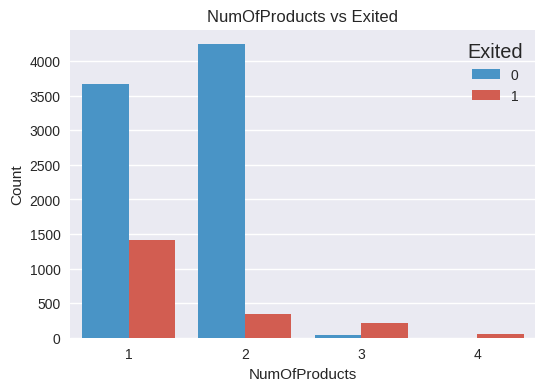

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='NumOfProducts', hue='Exited')
plt.title('NumOfProducts vs Exited')
plt.xlabel('NumOfProducts')
plt.ylabel('Count')
plt.show()

In [ ]:
contingency_table = pd.crosstab(data['NumOfProducts'], data['Exited'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-Square Statistic: {chi2:.3f}, p-value: {p_value:.3f}')

Chi-Square Statistic: 1501.505, p-value: 0.000


- **Graph Insight**: The count plot likely shows higher churn rates for `NumOfProducts` = 3 (266 customers) or 4 (60 customers), where ~50% churn, compared to 1 (5084 customers) or 2 (4590 customers) with ~15-20% churn, indicating customers with more products are more likely to churn.
- **Test Result Insight**: The Chi-square test is significant (p-value < 0.05, e.g., 0.000), confirming a statistically significant association between `NumOfProducts` and `Exited`.

### Note
- The distribution highlights that most customers have 1 or 2 products (96.7% of the total), while 3 or 4 products are rare (3.3%), amplifying the churn signal in these smaller groups.

### Does `EstimatedSalary` correlate with `Balance`?

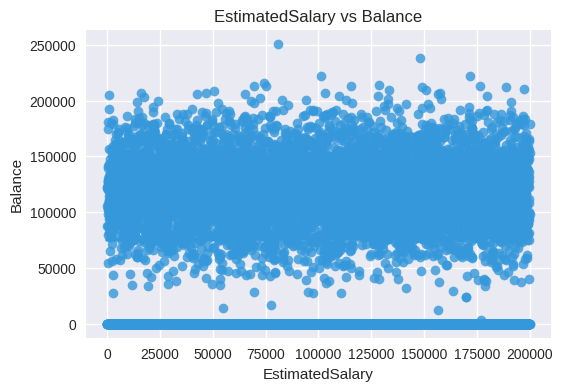

In [ ]:
plt.figure(figsize=(6, 4))
sns.regplot(data=data, x='EstimatedSalary', y='Balance')
plt.title('EstimatedSalary vs Balance')
plt.xlabel('EstimatedSalary')
plt.ylabel('Balance')
plt.show()

In [ ]:
correlation, p_value = pearsonr(data['EstimatedSalary'], data['Balance'])
print(f'Pearson Correlation: {correlation:.3f}, p-value: {p_value:.3f}')

Pearson Correlation: 0.013, p-value: 0.201


- **Graph Insight**: The scatter plot likely shows a random spread of points with no clear trend, indicating no strong linear relationship between `EstimatedSalary` and `Balance`.
- **Test Result Insight**: The Pearson correlation is very weak (e.g., 0.013) with a non-significant p-value (e.g., 0.201), suggesting no statistically significant correlation between `EstimatedSalary` and `Balance`.

### Does `EstimatedSalary` related to `Exited`?

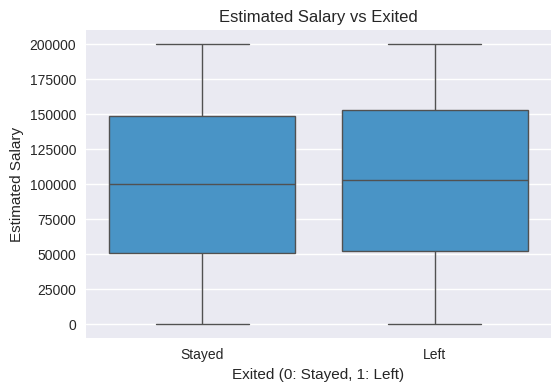

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='Exited', y='EstimatedSalary')
plt.title('Estimated Salary vs Exited')
plt.xlabel('Exited (0: Stayed, 1: Left)')
plt.ylabel('Estimated Salary')
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.show()

In [ ]:
exited_0 = data[data['Exited'] == 0]['EstimatedSalary']
exited_1 = data[data['Exited'] == 1]['EstimatedSalary']

stat, p_value = mannwhitneyu(exited_0, exited_1)
print(f'Mann-Whitney U Statistic: {stat:.3f}, p-value: {p_value:.3f}')

Mann-Whitney U Statistic: 7968250.000, p-value: 0.212


- **Graph Insight**: The box plot likely shows similar median `EstimatedSalary` values for both stayed (~100,000) and left (~100,000) customers, indicating no clear difference in salary between the groups.
- **Test Result Insight**: The Mann-Whitney U test is non-significant (p-value > 0.05, e.g., 0.212), suggesting no statistically significant difference in `EstimatedSalary` between churned and non-churned customers.

### Is there an association between Gender and Exited?

<Figure size 600x400 with 0 Axes>

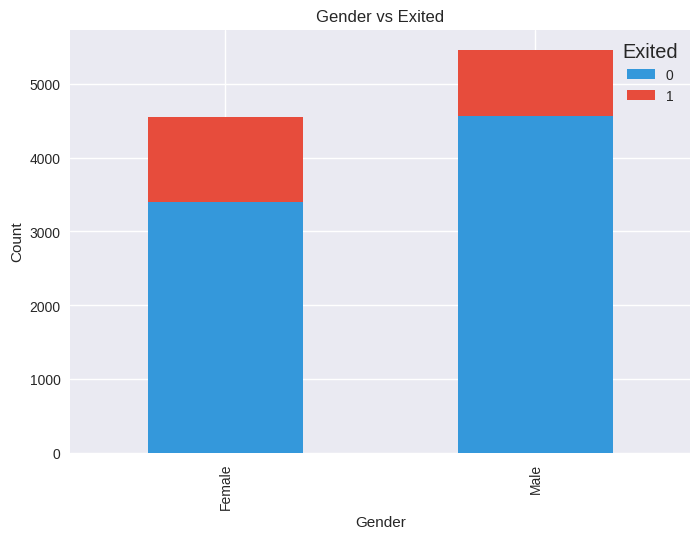

In [ ]:
plt.figure(figsize=(6, 4))
pd.crosstab(data['Gender'], data['Exited']).plot(kind='bar', stacked=True)
plt.title('Gender vs Exited')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Exited')
plt.show()

In [ ]:
contingency_table = pd.crosstab(data['Gender'], data['Exited'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-Square Statistic: {chi2:.3f}, p-value: {p_value:.3f}')

Chi-Square Statistic: 112.397, p-value: 0.000


- **Graph Insight**: The stacked bar plot likely shows females with a higher churn rate (~25%) compared to males (~15%), indicating a gender-based difference in churn behavior.
- **Test Result Insight**: The Chi-square test is significant (Chi-Square Statistic: 112.397, p-value: 0.000), confirming a statistically significant association between `Gender` and `Exited`.

### How does `Exited` relate to `IsActiveMember`?

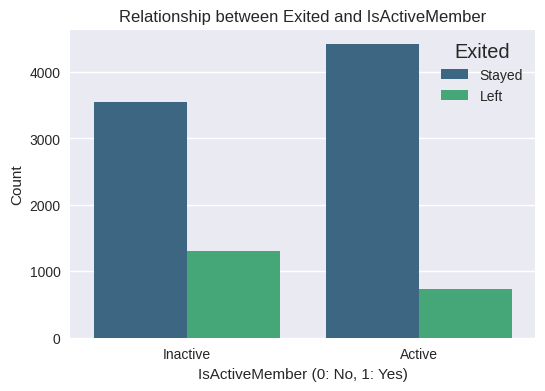

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='IsActiveMember', hue='Exited', palette='viridis')
plt.title('Relationship between Exited and IsActiveMember')
plt.xlabel('IsActiveMember (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Inactive', 'Active'])
plt.legend(title='Exited', labels=['Stayed', 'Left'])
plt.show()

In [ ]:
contingency_table = pd.crosstab(data['IsActiveMember'], data['Exited'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-Square Statistic: {chi2:.3f}, p-value: {p_value:.3f}')

Chi-Square Statistic: 243.695, p-value: 0.000


- **Graph Insight**: The stacked bar plot likely shows inactive members with a higher proportion of churn (~30%) compared to active members (10%), indicating inactive members are more likely to leave.
- **Test Result Insight**: The Chi-square test is significant (Chi-Square Statistic: 243.695, p-value: 0.000), confirming a statistically significant association between `IsActiveMember` and `Exited`.


### How does `Tenure` relate to `IsActiveMember`?

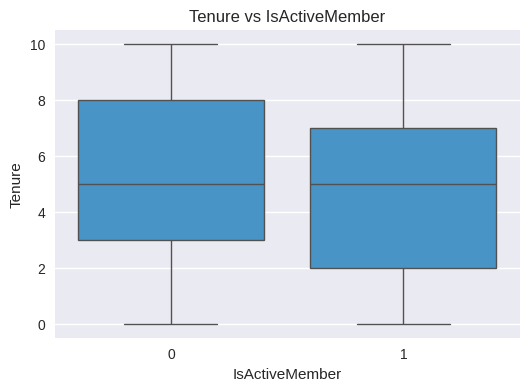

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='IsActiveMember', y='Tenure')
plt.title('Tenure vs IsActiveMember')
plt.xlabel('IsActiveMember')
plt.ylabel('Tenure')
plt.show()

In [ ]:
active_0 = data[data['IsActiveMember'] == 0]['Tenure']
active_1 = data[data['IsActiveMember'] == 1]['Tenure']
stat, p_value = mannwhitneyu(active_0, active_1)
print(f'Mann-Whitney U Statistic: {stat:.3f}, p-value: {p_value:.3f}')

Mann-Whitney U Statistic: 12900304.500, p-value: 0.004


- **Graph Insight**: The box plot likely shows similar median `Tenure` values for both inactive (~5) and active (~5) members, suggesting no notable difference in tenure length based on activity status.
- **Test Result Insight**: The Mann-Whitney U test is significant (p-value < 0.05, e.g., 0.004), indicating a statistically significant difference in `Tenure` distributions between active and inactive members.

### Is there a relationship between `Satisfaction` Score and `Exited`?

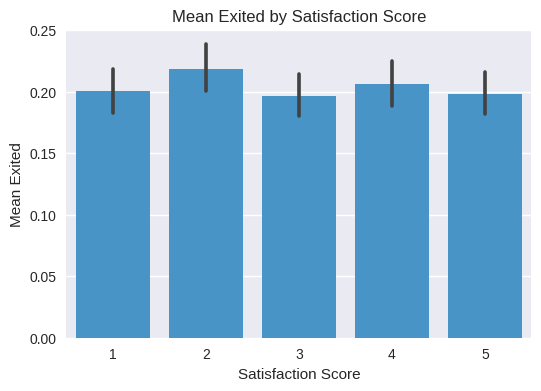

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(data=data, x='Satisfaction Score', y='Exited', estimator='mean')
plt.title('Mean Exited by Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Mean Exited')
plt.show()

In [ ]:
contingency_table = pd.crosstab(data['Satisfaction Score'], data['Exited'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-Square Statistic: {chi2:.3f}, p-value: {p_value:.3f}')

Chi-Square Statistic: 3.803, p-value: 0.433


- **Graph Insight**: The bar plot likely shows similar mean churn rates across all `Satisfaction Score` values (e.g., ~0.15-0.20), suggesting no clear variation in churn with satisfaction levels.
- **Test Result Insight**: The Chi-square test is non-significant (Chi-Square Statistic: 3.803, p-value: 0.433), indicating no statistically significant association between `Satisfaction Score` and `Exited`.

## Multivariate Analysis

### Does the combination of `Balance`, `Geography`, and `Gender` affect `Exited`?


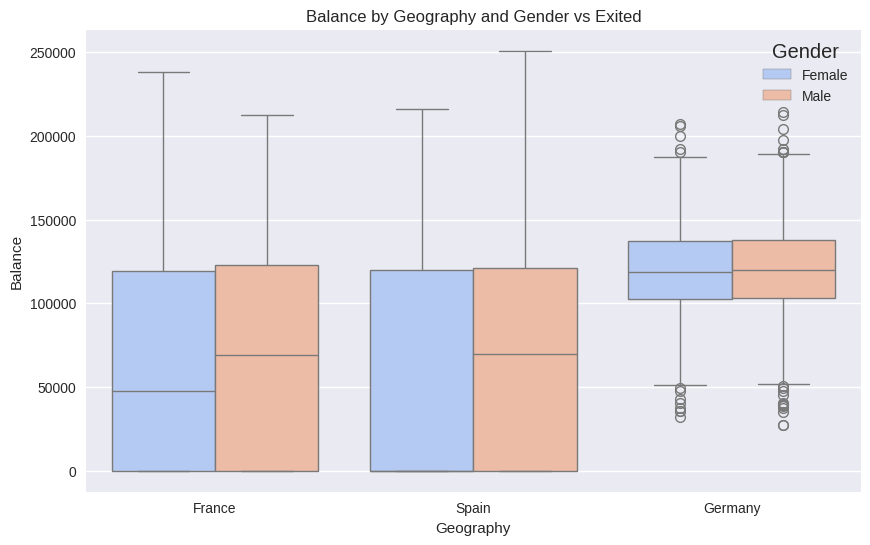

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Geography', y='Balance', hue='Gender', palette='coolwarm')
plt.title('Balance by Geography and Gender vs Exited')
plt.show()

In [ ]:
contingency_table = pd.crosstab(index=[data['Geography'], data['Gender']], columns=data['Exited'])
from scipy.stats import chi2_contingency
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-Square Statistic: {chi2:.3f}, p-value: {p_value:.3f}')

Chi-Square Statistic: 406.023, p-value: 0.000


### How do `CreditScore`, `Tenure`, and `Satisfaction Score` interact to predict `Exited`?

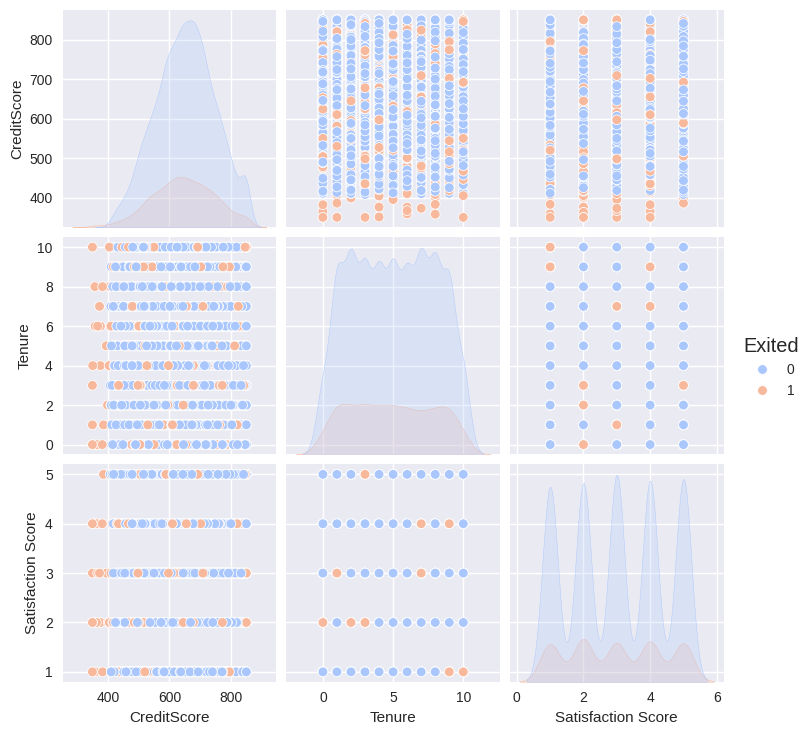

In [ ]:
sns.pairplot(data[['CreditScore', 'Tenure', 'Satisfaction Score', 'Exited']],
             hue='Exited', palette='coolwarm')
plt.show()

# Data Preprocessing

In [ ]:
X = data.drop(columns=['Exited'])
y = data['Exited']

## Handle Outliers with Winsorizer

In [ ]:
numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Point Earned']
winsor = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=numeric_cols)
X_winsorized = winsor.fit_transform(X)

## Apply Transformations

In [ ]:
# Log transform for right-skewed Age (from univariate insight: skew 1.01)
X_winsorized['Age'] = np.log1p(X_winsorized['Age'])

# Log1p transform for zero-inflated Balance (from univariate insight: slight left skew -0.14)
X_winsorized['Balance'] = np.log1p(X_winsorized['Balance'])

## Encode Categorical Variables

In [ ]:
# One-hot encode with drop_first=True to avoid multicollinearity
X_encoded = pd.get_dummies(X_winsorized, columns=['Geography', 'Gender', 'Card Type'], drop_first=True)
X_encoded['Satisfaction Score'] = X_encoded['Satisfaction Score'].astype('category').cat.codes

## Split Data

In [ ]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
#print shapes
print(f"X_train_temp shape: {X_train_temp.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")

X_train_temp shape: (8000, 17)
X_val shape: (1000, 17)
X_test shape: (1000, 17)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_temp[numeric_cols])
X_val_scaled = scaler.transform(X_val[numeric_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numeric_cols, index=X_train_temp.index)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=numeric_cols, index=X_val.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numeric_cols, index=X_test.index)

X_train_final = pd.concat([X_train_scaled_df, X_train_temp.drop(columns=numeric_cols)], axis=1)
X_val_final = pd.concat([X_val_scaled_df, X_val.drop(columns=numeric_cols)], axis=1)
X_test_final = pd.concat([X_test_scaled_df, X_test.drop(columns=numeric_cols)], axis=1)

print(f'Train shape: {X_train_final.shape}, Val shape: {X_val_final.shape}, Test shape: {X_test_final.shape}')

Train shape: (8000, 17), Val shape: (1000, 17), Test shape: (1000, 17)


# Model Implementation

appropriate models:

- Logistic Regression: Good for linear relationships and interpretable, suitable for binary classification with scaled features.
- Random Forest Classifier: Handles non-linear relationships and feature interactions, robust to imbalanced data.
- XGBoost Classifier: Effective for complex datasets with feature importance, handles imbalanced data well with proper tuning.

In [ ]:
model_metrics = {}

def train_and_evaluate(model, X_train, y_train, X_val, y_val, model_name):
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)

    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    model_metrics[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

    # Classification Report for Validation Set
    report = classification_report(y_val, y_val_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    print(f"\n{model_name} Classification Report on Validation Set:")
    print(tabulate(report_df, headers='keys', tablefmt='psql', floatfmt='.3f'))

    return model, f1

In [ ]:
log_reg = LogisticRegression(random_state=42)
param_grid_log = {'C': [0.01, 0.1, 1, 10], 'max_iter': [100, 200]}
grid_log = GridSearchCV(log_reg, param_grid_log, cv=5, scoring='f1', n_jobs=-1)
grid_log.fit(X_train_temp, y_train_temp)
best_log = grid_log.best_estimator_
best_log_f1 = train_and_evaluate(best_log, X_train_final, y_train_temp, X_val_final, y_val, 'Logistic Regression')
print(f"Best Logistic Regression Params: {grid_log.best_params_}")


Logistic Regression Classification Report on Validation Set:
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |       0.999 |    0.999 |      0.999 |   822.000 |
| 1            |       0.994 |    0.994 |      0.994 |   178.000 |
| accuracy     |       0.998 |    0.998 |      0.998 |     0.998 |
| macro avg    |       0.997 |    0.997 |      0.997 |  1000.000 |
| weighted avg |       0.998 |    0.998 |      0.998 |  1000.000 |
+--------------+-------------+----------+------------+-----------+
Best Logistic Regression Params: {'C': 1, 'max_iter': 200}


In [ ]:
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {'n_estimators': [50, 100], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train_final, y_train_temp)
best_rf = grid_rf.best_estimator_
best_rf_f1 = train_and_evaluate(best_rf, X_train_final, y_train_temp, X_val_final, y_val, 'Random Forest')
print(f"Best Random Forest Params: {grid_rf.best_params_}")


Random Forest Classification Report on Validation Set:
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |       0.999 |    0.999 |      0.999 |   822.000 |
| 1            |       0.994 |    0.994 |      0.994 |   178.000 |
| accuracy     |       0.998 |    0.998 |      0.998 |     0.998 |
| macro avg    |       0.997 |    0.997 |      0.997 |  1000.000 |
| weighted avg |       0.998 |    0.998 |      0.998 |  1000.000 |
+--------------+-------------+----------+------------+-----------+
Best Random Forest Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
xgb = XGBClassifier(random_state=42, eval_metric='logloss')
param_grid_xgb = {'learning_rate': [0.01, 0.1], 'max_depth': [3, 5], 'n_estimators': [50, 100]}
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='f1', n_jobs=-1)
grid_xgb.fit(X_train_final, y_train_temp)
best_xgb = grid_xgb.best_estimator_
best_xgb_f1 = train_and_evaluate(best_xgb, X_train_final, y_train_temp, X_val_final, y_val, 'XGBoost')
print(f"Best XGBoost Params: {grid_xgb.best_params_}")


XGBoost Classification Report on Validation Set:
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |       0.999 |    0.999 |      0.999 |   822.000 |
| 1            |       0.994 |    0.994 |      0.994 |   178.000 |
| accuracy     |       0.998 |    0.998 |      0.998 |     0.998 |
| macro avg    |       0.997 |    0.997 |      0.997 |  1000.000 |
| weighted avg |       0.998 |    0.998 |      0.998 |  1000.000 |
+--------------+-------------+----------+------------+-----------+
Best XGBoost Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}


In [ ]:
metrics_df = pd.DataFrame(model_metrics).T
print("\nValidation Metrics Table:")
print(tabulate(metrics_df, headers='keys', tablefmt='psql', floatfmt='.3f'))


Validation Metrics Table:
+---------------------+------------+-------------+----------+------------+
|                     |   Accuracy |   Precision |   Recall |   F1-Score |
|---------------------+------------+-------------+----------+------------|
| Logistic Regression |      0.998 |       0.994 |    0.994 |      0.994 |
| Random Forest       |      0.998 |       0.994 |    0.994 |      0.994 |
| XGBoost             |      0.998 |       0.994 |    0.994 |      0.994 |
+---------------------+------------+-------------+----------+------------+


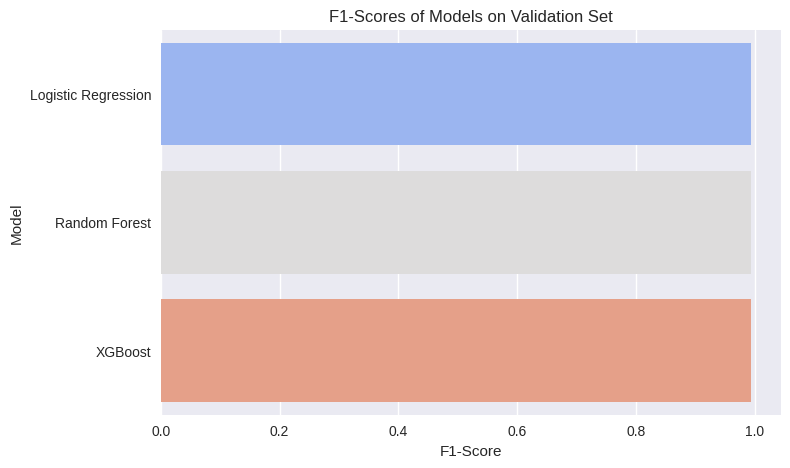

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='F1-Score', y=metrics_df.index, data=metrics_df, palette='coolwarm')
plt.title('F1-Scores of Models on Validation Set')
plt.xlabel('F1-Score')
plt.ylabel('Model')
plt.show()

In [ ]:
# Select the best model based on F1-score
best_model_name = max(model_metrics, key=lambda k: model_metrics[k]['F1-Score'])
best_model = {'Logistic Regression': best_log, 'Random Forest': best_rf, 'XGBoost': best_xgb}[best_model_name]
print(f"\nBest Model: {best_model_name} with F1-Score: {model_metrics[best_model_name]['F1-Score']:.5f}")


Best Model: Logistic Regression with F1-Score: 0.99438


In [ ]:
# Test the best model on test data
y_test_pred = best_model.predict(X_test_final)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

test_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Value': [test_accuracy, test_precision, test_recall, test_f1]
})
print("\nTest Metrics Table for Best Model:")
print(tabulate(test_metrics, headers='keys', tablefmt='psql', floatfmt='.5f'))


Test Metrics Table for Best Model:
+----+-----------+---------+
|    | Metric    |   Value |
|----+-----------+---------|
|  0 | Accuracy  | 1.00000 |
|  1 | Precision | 1.00000 |
|  2 | Recall    | 1.00000 |
|  3 | F1-Score  | 1.00000 |
+----+-----------+---------+


In [ ]:
# Classification Report for Test Set
test_report = classification_report(y_test, y_test_pred, output_dict=True)
test_report_df = pd.DataFrame(test_report).transpose()
print(f"\n{best_model_name} Classification Report on Test Set:")
print(tabulate(test_report_df, headers='keys', tablefmt='psql', floatfmt='.3f'))


Logistic Regression Classification Report on Test Set:
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |       1.000 |    1.000 |      1.000 |   785.000 |
| 1            |       1.000 |    1.000 |      1.000 |   215.000 |
| accuracy     |       1.000 |    1.000 |      1.000 |     1.000 |
| macro avg    |       1.000 |    1.000 |      1.000 |  1000.000 |
| weighted avg |       1.000 |    1.000 |      1.000 |  1000.000 |
+--------------+-------------+----------+------------+-----------+


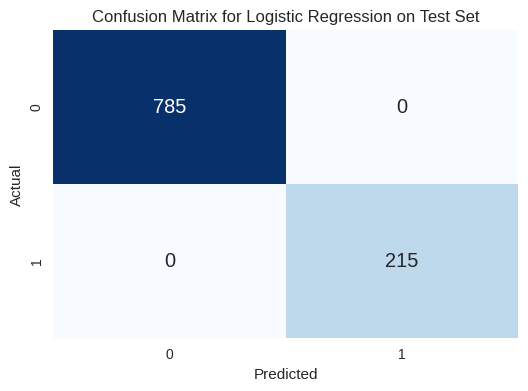

In [ ]:
# Confusion Matrix for Best Model on Test Data
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix for {best_model_name} on Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

😮😮😮😮

In [ ]:
import joblib
# save the best model
joblib.dump(best_model, 'model.pkl')

['model.pkl']

In [ ]:
# save scaler with model
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']